In [1]:
%matplotlib inline

In [11]:
import gzip

import numpy as np
import scipy as scp
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cross_validation import train_test_split

## MNIST dataset

In [3]:
def parse_img(filename):
    '''Parses mnist images in filename.'''
    f = gzip.open(filename)
    arr = np.frombuffer(f.read(), dtype=np.dtype('>u1'), offset=16)
    arr = arr.astype(np.int64)
    f.close()
    return arr.reshape((-1, 28*28))

def parse_label(filename):
    '''Parses mnist labels in filename.'''
    f = gzip.open(filename)
    arr = np.frombuffer(f.read(), dtype=np.dtype('>u1'), offset=8)
    f.close()
    return arr

In [6]:
X_data = parse_img('mnist data/train-images-idx3-ubyte.gz')
y_data = parse_label('mnist data/train-labels-idx1-ubyte.gz')
print(X_data.shape, X_data.dtype)
print(y_data.shape, y_data.dtype)

(60000, 784) int64
(60000,) uint8


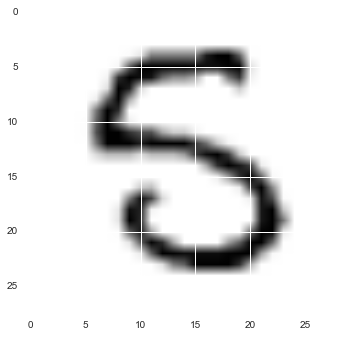

In [8]:
def plot_img(x):
    plt.imshow(x.reshape((28, 28)), cmap=plt.cm.gray_r)

plot_img(X_data[np.random.randint(0, len(X_data))])

In [12]:
# We'll use the 3s and 8s.
X3 = X_data[y_data == 3]
X8 = X_data[y_data == 8]
print(X3.shape)
print(X8.shape)
print()

X = np.vstack([X3, X8])
y = np.concatenate([[0] * len(X3), [1] * len(X8)])
print(X.shape)
print(y.shape)
print()

# Use 10% for validation.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6131, 784)
(5851, 784)

(11982, 784)
(11982,)

(10783, 784)
(10783,)
(1199, 784)
(1199,)


Label of sample image is 0


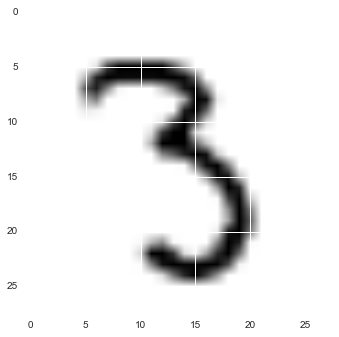

In [17]:
# Sanity check.
sampleImgIdx = np.random.randint(0, len(X_train))
sampleImg = X_train[sampleImgIdx]
sampleLabel = y_train[sampleImgIdx]
print('Label of sample image is ' + str(sampleLabel))
plot_img(sampleImg)

## Next steps
1. Plot eigenvalues as a function of i where i is the ith largest eigenvalue. Do for different $\alpha \in [0, 1]$
1. Plot $d_{95}$ (effective dimension) as a function of $\alpha$.
1. Logistic (or SVM) error as a function of $\alpha$. (note hidden targest are input an label targets). 